In [2]:
import pandas as pd
credit = pd.read_csv('default of credit card clients.csv', header =1)

In [3]:
# Use the get_dummies() function within pandas to convert non-numeric columns to a series of binary numeric 'Dummy' columns
credit = pd.get_dummies(credit)
# Print credit
credit

,ID,LIMIT_BAL,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,...,PAY_AMT5,PAY_AMT6,SEX_female,SEX_male,EDUCATION_graduate school,EDUCATION_high school,EDUCATION_other,EDUCATION_university,default payment next month_default,default payment next month_not default
0,1,20000,1,24,2,2,-1,-1,-2,-2,...,0,0,1,0,0,0,0,1,1,0
1,2,120000,2,26,-1,2,0,0,0,2,...,0,2000,1,0,0,0,0,1,1,0
2,3,90000,2,34,0,0,0,0,0,0,...,1000,5000,1,0,0,0,0,1,0,1
3,4,50000,1,37,0,0,0,0,0,0,...,1069,1000,1,0,0,0,0,1,0,1
4,5,50000,1,57,-1,0,-1,0,0,0,...,689,679,0,1,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,1,39,0,0,0,0,0,0,...,5000,1000,0,1,0,1,0,0,0,1
29996,29997,150000,2,43,-1,-1,-1,-1,0,0,...,0,0,0,1,0,1,0,0,0,1
29997,29998,30000,2,37,4,3,2,-1,0,0,...,2000,3100,0,1,0,0,0,1,1,0
29998,29999,80000,1,41,1,-1,0,0,0,-1,...,52964,1804,0,1,0,1,0,0,1,0


The categorical variables SEX and EDUCATION are now converted to dummy variables.

# Correlation

In [ ]:
# building a basic correlation coefficient matrix using pandas:
# Strength of correlations:
#   Very strong relationship  (|r| >= 0.8)
#   Strong relationship       (|r| >= 0.6)
#   Moderate relationship     (|r| >= 0.4)
#   Weak relationship         (|r| >= 0.2)
#   Very weak relationship    (0< |r|< 0.2)

corrMat = credit.corr()


In [ ]:
# Create Pearson correlation matrix visualization, and limit to 2 decimal places:
corrMat.style.background_gradient(cmap='coolwarm').set_precision(2)

LIMIT_BAL has

1) very weak positive correlation to age

2) very weak negative correlation to MARRIAGE

3) weak negative correlation to PAY_x (=> LIMIT_BAL increases as pay in full or no consumption, LIMIT_BAL decreases as paymentdelinquent as month increase)

4) weak positive correlation to BILL_AMTx and PAY_AMTx where x = 1,..,6

5) very weak positive correlation PAY_AMT1 and PAY_AMT2, weak positive correlation to PAY_AMTx where x = 3,..,6

6) No linear correlation with gender

7) weak positive correlation to EDUCATION graduate_school

8) weak negative correlation to default_payment_next_month_default

default_payment_next_month_default has

1) no linear correlation with age, gender, marital status, education,BILL_AMTx, PAY_AMTx where x = 1,..,6

2) very weak negative correlation to LIMIT_BAL

3) weak positive correlation to PAY_x, where x = 0, 2, 3, 4, 5, 6. Note that the strength of the linear correlations decrease as x increases.

# Covariance

Covariance is often used to gauge the linear degree of change between two variables. This will be very important when studying the impact various features might have on default rates

In [ ]:
# To calculate covariance in Pandas enter the following
covMat = credit.cov()

In [ ]:
# Create Pearson correlation matrix visualization, and limit to 2 decimal places:
covMat.style.background_gradient(cmap='coolwarm').set_precision(2)

The concern about using COVARIANCE matrix is that the scale (or range) of the variables may cause some variables to dominate, in this case will be LIMIT_BAL, BILL_AMTx and PAY_AMTx. 

# CREATE NEW VARIABLES

In [4]:
# Since the correlation coefficients among "BILL_AMT" are almost the same for credit limit and also default_payment_next_month
# Create a variable TOTAL_BILL as the sum of all the 6 months' BILL_AMTs
import numpy as np
# Create a variable TOTAL_BILL as the sum of all the 6 months' BILL_AMTs
credit["TOTAL_BILL"] = credit["BILL_AMT1"]+credit["BILL_AMT2"]+credit["BILL_AMT3"]+credit["BILL_AMT4"]+credit["BILL_AMT5"]+credit["BILL_AMT6"]

In [5]:
credit["AVE_BILL"] =credit["TOTAL_BILL"]/6000

In [7]:
# Since the PAY_AMTs correlation coefficients are almost the same for credit limit and also default_payment_next_month
# Create a variable TOTAL_PAY as the sum of all the 6 months' PAY_AMTs
credit["TOTAL_PAY"] = credit["PAY_AMT1"]+credit["PAY_AMT2"]+credit["PAY_AMT3"]+credit["PAY_AMT4"]+credit["PAY_AMT5"]+credit["PAY_AMT6"]

In [9]:
credit["AVE_PAY_AMT"] =credit["TOTAL_PAY"]/6000

In [10]:
# Add 2 to each PAY_x, so all will be non-negative. 
# Create a variable PAY_STAT1
credit["PAY_STATUS"] = credit["PAY_0"]+credit["PAY_2"]+credit["PAY_3"]+credit["PAY_4"]+credit["PAY_5"]+credit["PAY_6"]+12

PAY_x with x = 0, 2, 3, 4, 5 ,6 indicate about 50% are using the revolving payment.

In [12]:
# remove redundant columns
credit=credit.drop(['ID','SEX_male','EDUCATION_other','PAY_0','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6','PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6','BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6','default payment next month_not default','TOTAL_BILL','TOTAL_PAY'], axis=1)

In [13]:
credit.head(2)

,LIMIT_BAL,MARRIAGE,AGE,SEX_female,EDUCATION_graduate school,EDUCATION_high school,EDUCATION_university,default payment next month_default,AVE_BILL,AVE_PAY_AMT,PAY_STATUS
0,20000,1,24,1,0,0,1,1,1.284000,0.114833,10
1,120000,2,26,1,0,0,1,1,2.846167,0.833333,15


In [14]:
corrMat2 = credit.corr()
corrMat2.style.background_gradient(cmap='coolwarm').set_precision(2)

,LIMIT_BAL,MARRIAGE,AGE,SEX_female,EDUCATION_graduate school,EDUCATION_high school,EDUCATION_university,default payment next month_default,AVE_BILL,AVE_PAY_AMT,PAY_STATUS
LIMIT_BAL,1.00,-0.11,0.14,0.02,0.26,-0.14,-0.15,-0.15,0.30,0.35,-0.32
MARRIAGE,-0.11,1.00,-0.41,-0.03,0.14,-0.11,-0.05,-0.02,-0.02,-0.01,0.04
AGE,0.14,-0.41,1.00,-0.09,-0.10,0.23,-0.08,0.01,0.05,0.04,-0.06
SEX_female,0.02,-0.03,-0.09,1.00,-0.02,-0.01,0.03,-0.04,-0.03,-0.00,-0.07
EDUCATION_graduate school,0.26,0.14,-0.10,-0.02,1.00,-0.33,-0.69,-0.05,-0.01,0.08,-0.18
EDUCATION_high school,-0.14,-0.11,0.23,-0.01,-0.33,1.00,-0.41,0.03,-0.03,-0.05,0.07
EDUCATION_university,-0.15,-0.05,-0.08,0.03,-0.69,-0.41,1.00,0.04,0.03,-0.05,0.13
default payment next month_default,-0.15,-0.02,0.01,-0.04,-0.05,0.03,0.04,1.00,-0.01,-0.10,0.28
AVE_BILL,0.30,-0.02,0.05,-0.03,-0.01,-0.03,0.03,-0.01,1.00,0.34,0.28
AVE_PAY_AMT,0.35,-0.01,0.04,-0.00,0.08,-0.05,-0.05,-0.10,0.34,1.00,-0.07


Note that EDucation University and EDUCATION university have high negative correlation. We may consider removing EDUCATION_University because its coeff is lower

# Factors affecting Default

In [15]:
# conventional way to import seaborn
import seaborn as sns

# allow plots to appear within the notebook
%matplotlib inline

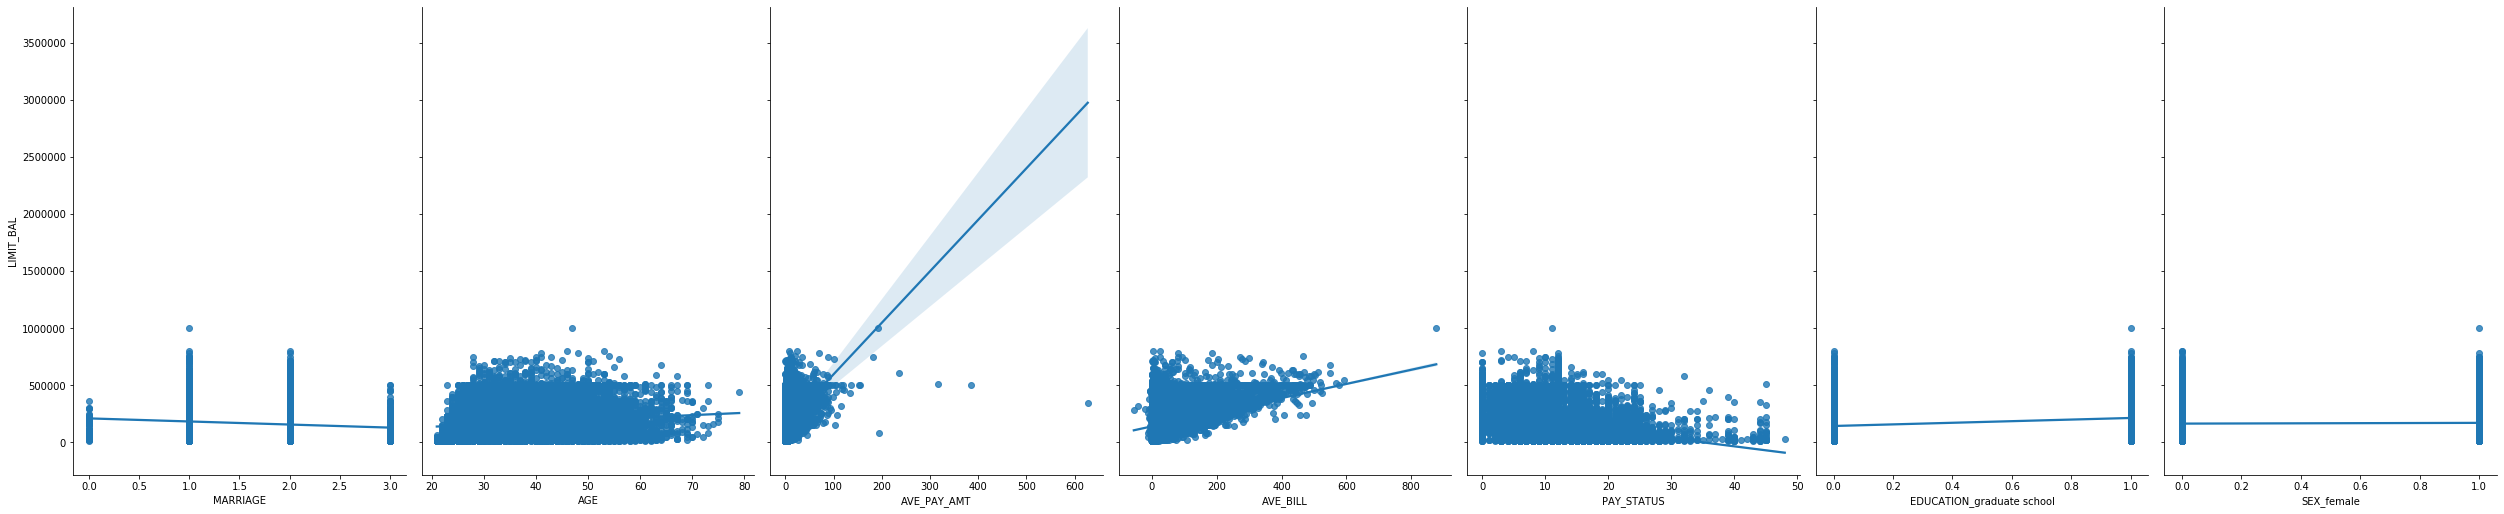

In [16]:
# visualize the relationship between the features and the response using scatterplots
sns.pairplot(credit, x_vars=['MARRIAGE','AGE','AVE_PAY_AMT','AVE_BILL','PAY_STATUS','EDUCATION_graduate school','SEX_female'], y_vars='LIMIT_BAL', height=7, aspect=0.7, kind='reg')

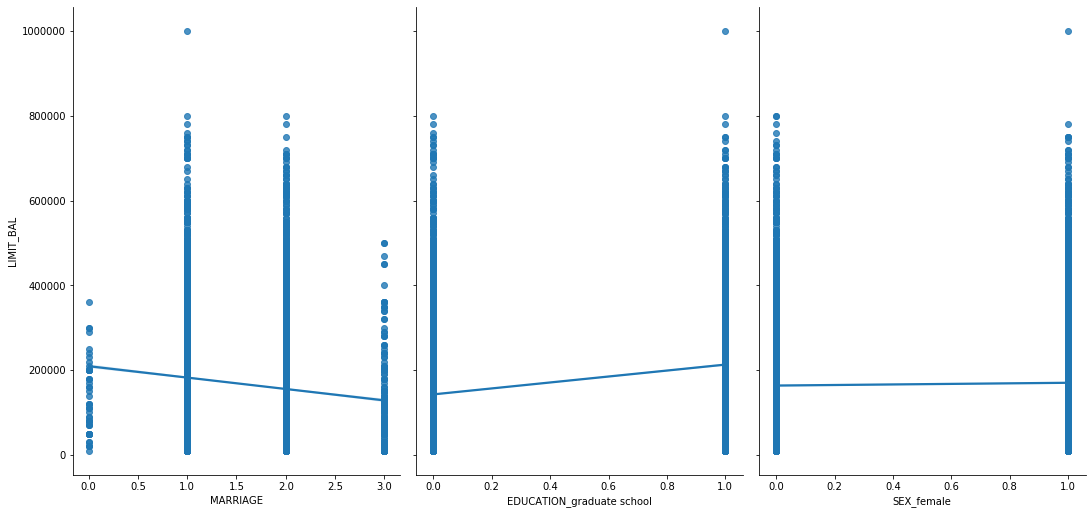

In [17]:
# visualize the relationship between the features and the response using scatterplots
sns.pairplot(credit, x_vars=['MARRIAGE','EDUCATION_graduate school','SEX_female'], y_vars='LIMIT_BAL', height=7, aspect=0.7, kind='reg')

Gender is relatively flat

# Setting up features and target

In [18]:
# create a Python list of feature names
feature_cols = ['AVE_PAY_AMT','AVE_BILL','PAY_STATUS','MARRIAGE','AGE','EDUCATION_graduate school','EDUCATION_university','EDUCATION_high school','SEX_female','default payment next month_default']
feature_col1 = ['AVE_PAY_AMT','AVE_BILL','PAY_STATUS','MARRIAGE','AGE','EDUCATION_graduate school','EDUCATION_high school','default payment next month_default','SEX_female']
feature_col2 = ['AVE_PAY_AMT','AVE_BILL','PAY_STATUS','MARRIAGE','EDUCATION_graduate school','EDUCATION_high school','SEX_female','default payment next month_default']

In [19]:
# use the list to select a subset of the original DataFrame
X = credit[feature_cols]
X1 = credit[feature_col1]
X2 = credit[feature_col2]

In [20]:
# check the type and shape of X
print(type(X))
print(X.shape)

<class 'pandas.core.frame.DataFrame'>
(30000, 10)


In [21]:
# select a Series from the DataFrame
y = credit['LIMIT_BAL']
y1= credit['LIMIT_BAL']
y2 = credit['LIMIT_BAL']
# print the first 5 values
y.head()

0     20000
1    120000
2     90000
3     50000
4     50000
Name: LIMIT_BAL, dtype: int64

In [22]:
# check the type and shape of y
print(type(y))
print(y.shape)

<class 'pandas.core.series.Series'>
(30000,)


# Splitting X and y into training and testing sets

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123)
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, random_state=13)
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, random_state=14)

In [24]:
# default split is 75% for training and 25% for testing
print(X_train.shape, y_train.shape)
print(X_test.shape, y_train.shape)
print(X1_train.shape, y1_train.shape)
print(X1_test.shape, y1_train.shape)
print(X2_train.shape, y2_train.shape)
print(X2_test.shape, y2_train.shape)

(22500, 10) (22500,)
(7500, 10) (22500,)
(22500, 9) (22500,)
(7500, 9) (22500,)
(22500, 8) (22500,)
(7500, 8) (22500,)


# Run Linear regression in scikit-learn

In [25]:
from sklearn.linear_model import LinearRegression

# instantiate
linreg = LinearRegression()

# fit the model to the training data (learn the coefficients)
linreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [26]:
# print the intercept and coefficients
print(linreg.intercept_)
print(linreg.coef_)

167517.8750006264
[  2442.97331657    664.06603919  -7504.37350284 -20115.96225011
   1460.44815705  53793.25300452   2617.97413815 -22236.29622965
   5921.1169116   -6245.73325947]


In [27]:
# pair the feature names with the coefficients
list(zip(feature_cols, linreg.coef_))

[('AVE_PAY_AMT', 2442.9733165716175),
 ('AVE_BILL', 664.0660391861727),
 ('PAY_STATUS', -7504.373502837002),
 ('MARRIAGE', -20115.96225011451),
 ('AGE', 1460.4481570501139),
 ('EDUCATION_graduate school', 53793.253004521226),
 ('EDUCATION_university', 2617.974138145262),
 ('EDUCATION_high school', -22236.296229653293),
 ('SEX_female', 5921.11691160006),
 ('default payment next month_default', -6245.733259473552)]

In [28]:
# make predictions on the testing set
y_pred = linreg.predict(X_test)

# Evaluate Regression Model using Mean Absolute Error (MAE), Mean Squared Error (MSE) and Root Mean Squared Error (RMSE)

In [29]:
# calculate MAE using scikit-learn
from sklearn import metrics
print(metrics.mean_absolute_error(y_test, y_pred))

78704.11504989049


In [30]:
# calculate MSE using scikit-learn
print(metrics.mean_squared_error(y_test, y_pred))

10612576340.99368


In [31]:
# calculate RMSE using scikit-learn

print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

103017.35941574934


In [32]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred, multioutput='variance_weighted')

0.3577108685498297

R-square is 0.36 implies this model does not fit well.

In [33]:
linreg.fit(X1_train, y1_train)
y1_pred = linreg.predict(X1_test)

In [34]:
y1_mae = metrics.mean_absolute_error(y1_test, y1_pred)
y1_mse = metrics.mean_squared_error(y1_test, y1_pred)
y1_rmse = np.sqrt(metrics.mean_squared_error(y1_test, y1_pred))
y1_r2 = r2_score(y1_test, y1_pred, multioutput='variance_weighted')
print(y1_mae, y1_mse,y1_rmse, y1_r2)

80872.26664427384 11570507136.619955 107566.29182332147 0.31346492390649894


In [35]:
linreg.fit(X2_train, y2_train)
y2_pred = linreg.predict(X2_test)

In [36]:
y2_mae = metrics.mean_absolute_error(y2_test, y2_pred)
y2_mse = metrics.mean_squared_error(y2_test, y2_pred)
y2_rmse = np.sqrt(metrics.mean_squared_error(y2_test, y2_pred))
y2_r2 = r2_score(y2_test, y2_pred, multioutput='variance_weighted')
print(y2_mae, y2_mse,y2_rmse, y2_r2)

80319.72943030825 11049250489.086275 105115.41508782751 0.349006906666132


Compare r-square, mae, rmse of the 3 models. the first one is the best out of the three. But it is still not good.

In [37]:
from sklearn.model_selection import cross_val_score
linreg = LinearRegression()
MSEs = cross_val_score(linreg, X1, y, scoring=('neg_mean_squared_error'),cv=5)
mean_MSE=np.mean(MSEs)
print(mean_MSE)

-10892261665.71806


In [38]:
from sklearn.model_selection import cross_val_score
linreg = LinearRegression()
MSEs = cross_val_score(linreg, X2, y, scoring=('r2'),cv=5)
mean_MSE=np.mean(MSEs)
print(mean_MSE)

0.34332557518029005


No better than default regression

In [39]:
from sklearn.model_selection import cross_val_score
linreg = LinearRegression()
MSEs = cross_val_score(linreg, X, y, scoring=('neg_mean_squared_error'),cv=5)
mean_MSE=np.mean(MSEs)
print(mean_MSE)

-10892770604.934078


# LASSO - Least Absolute Shrinkage and Selection Operator

The Lasso is a linear model that estimates sparse coefficients. It is useful in some contexts due to its tendency to prefer solutions with fewer non-zero coefficients, effectively reducing the number of features upon which the given solution is dependent.

In [40]:
from sklearn import linear_model
lm_lasso = linear_model.Lasso(alpha=0.1)

In [41]:
lm_lasso.fit(X_train, y_train)

Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [42]:
# pair the feature names with the coefficients
list(zip(feature_cols, lm_lasso.coef_))

[('AVE_PAY_AMT', 2442.97462462358),
 ('AVE_BILL', 664.0665122376967),
 ('PAY_STATUS', -7504.3912856595425),
 ('MARRIAGE', -20115.52675796515),
 ('AGE', 1460.4457337449005),
 ('EDUCATION_graduate school', 53790.56687228947),
 ('EDUCATION_university', 2615.341000998596),
 ('EDUCATION_high school', -22238.096760530872),
 ('SEX_female', 5920.721462715296),
 ('default payment next month_default', -6245.083169772157)]

In [43]:
y_lasso_pred =lm_lasso.predict(X_test)

In [44]:
# calculate MAE using scikit-learn
print(metrics.mean_absolute_error(y_test, y_lasso_pred))

78704.11280462176


In [45]:
# calculate MSE using scikit-learn
print(metrics.mean_squared_error(y_test, y_lasso_pred))

10612574991.583458


In [46]:
# calculate RMSE using scikit-learn
print(np.sqrt(metrics.mean_squared_error(y_test, y_lasso_pred)))

103017.3528663179


In [47]:
from sklearn.metrics import r2_score
r2_score(y_test, y_lasso_pred, multioutput='variance_weighted')

0.3577109502181721

Not much different when run LASSO or Linear Regression using default parameters.

In [48]:
# search for an optimal value of n_job  for linear regression
n_range = list(range(1, 31))
n_mae = []
n_r2 = []
for n in n_range:
    linreg = LinearRegression(n_jobs=n)
    linreg.fit(X_train, y_train)
    y_pred = linreg.predict(X_test)
    mae = metrics.mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred, multioutput='variance_weighted')
    n_mae.append(mae)
    n_r2.append(r2)
print(n_range,n_mae,n_r2)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30] [78704.11504989049, 78704.11504989049, 78704.11504989049, 78704.11504989049, 78704.11504989049, 78704.11504989049, 78704.11504989049, 78704.11504989049, 78704.11504989049, 78704.11504989049, 78704.11504989049, 78704.11504989049, 78704.11504989049, 78704.11504989049, 78704.11504989049, 78704.11504989049, 78704.11504989049, 78704.11504989049, 78704.11504989049, 78704.11504989049, 78704.11504989049, 78704.11504989049, 78704.11504989049, 78704.11504989049, 78704.11504989049, 78704.11504989049, 78704.11504989049, 78704.11504989049, 78704.11504989049, 78704.11504989049] [0.3577108685498297, 0.3577108685498297, 0.3577108685498297, 0.3577108685498297, 0.3577108685498297, 0.3577108685498297, 0.3577108685498297, 0.3577108685498297, 0.3577108685498297, 0.3577108685498297, 0.3577108685498297, 0.3577108685498297, 0.3577108685498297, 0.3577108685498297, 0.3577108685498297, 0.35771086854982

Text(0, 0.5, 'Mean Absolute Error')

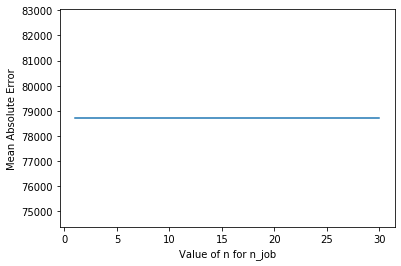

In [49]:
# import Matplotlib (scientific plotting library)
import matplotlib.pyplot as plt

# allow plots to appear within the notebook
%matplotlib inline
#plot the value of n for n-job(x-axis) versus the mae (y-axis)
plt.plot(n_range, n_mae)
plt.xlabel('Value of n for n_job')
plt.ylabel('Mean Absolute Error')

Note that no change in MAE with diffenent n for n_job

Text(0, 0.5, 'R-Square')

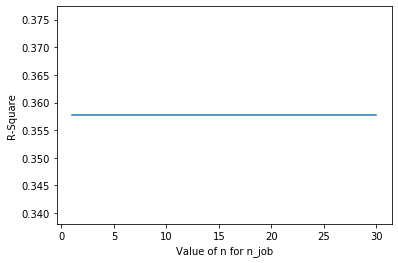

In [50]:
#plot the value of n for n-job(x-axis) versus the mae (y-axis)
plt.plot(n_range, n_r2)
plt.xlabel('Value of n for n_job')
plt.ylabel('R-Square')

No change in R2 for the different n

# Ridge regression and classification

In [51]:
# Bayesian Ridge Regression is used for regression:
bayesridge= linear_model.BayesianRidge()

In [52]:
bayesridge.fit(X_train, y_train)

BayesianRidge(alpha_1=1e-06, alpha_2=1e-06, alpha_init=None,
              compute_score=False, copy_X=True, fit_intercept=True,
              lambda_1=1e-06, lambda_2=1e-06, lambda_init=None, n_iter=300,
              normalize=False, tol=0.001, verbose=False)

In [53]:
y_bayesridge_pred =bayesridge.predict(X_test)

In [54]:
# calculate MAE using scikit-learn
print(metrics.mean_absolute_error(y_test, y_bayesridge_pred))

78700.3100577624


MAE from Bayesian Ridge Regression is higher than MAE from Linear Regression and LASSO

In [55]:
r2_score(y_test, y_bayesridge_pred, multioutput='variance_weighted')

0.3577883508169054

 Fitting data using Bayesian Ridge Regression resulting R-square much lower than R-squares obtained by Linear Regression and LASSO

# looking only at the default cases

In [56]:
# drop those have credit defaulted. 
creditdefault  = credit.copy()
# Get names of indexes for which column default_payment_next_month_default has value 0
indexNames = creditdefault[creditdefault['default payment next month_default'] == 0].index
# Delete these row indexes from dataFrame
creditdefault.drop(indexNames , inplace=True)

In [60]:
# create a Python list of feature names
default_feature_cols = ['AVE_PAY_AMT','AVE_BILL','PAY_STATUS','MARRIAGE','AGE','EDUCATION_graduate school','SEX_female','EDUCATION_university','EDUCATION_high school']

In [61]:
creditdefault.head(5)

,LIMIT_BAL,MARRIAGE,AGE,SEX_female,EDUCATION_graduate school,EDUCATION_high school,EDUCATION_university,default payment next month_default,AVE_BILL,AVE_PAY_AMT,PAY_STATUS
0,20000,1,24,1,0,0,1,1,1.284000,0.114833,10
1,120000,2,26,1,0,0,1,1,2.846167,0.833333,15
13,70000,2,30,0,0,0,1,1,56.447500,1.783333,19
16,20000,2,24,0,1,0,0,1,17.693500,1.058333,20
21,120000,1,39,1,0,0,1,1,0.316000,0.263333,6


In [62]:
# use the list to select a subset of the original DataFrame
X_default = creditdefault[default_feature_cols]
# print the first 5 rows
X_default.head()


,AVE_PAY_AMT,AVE_BILL,PAY_STATUS,MARRIAGE,AGE,EDUCATION_graduate school,SEX_female,EDUCATION_university,EDUCATION_high school
0,0.114833,1.284000,10,1,24,0,1,1,0
1,0.833333,2.846167,15,2,26,0,1,1,0
13,1.783333,56.447500,19,2,30,0,0,1,0
16,1.058333,17.693500,20,2,24,1,0,0,0
21,0.263333,0.316000,6,1,39,0,1,1,0


In [63]:
# select a Series from the DataFrame
y_default = creditdefault['LIMIT_BAL']
# print the first 5 values
y_default.head()

0      20000
1     120000
13     70000
16     20000
21    120000
Name: LIMIT_BAL, dtype: int64

In [64]:
Xd_train, Xd_test, yd_train, yd_test = train_test_split(X_default, y_default, random_state=123)

# fit the model to the training data (learn the coefficients)
linreg.fit(Xd_train, yd_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=30, normalize=False)

In [65]:
# print the intercept and coefficients
print(linreg.intercept_)
print(linreg.coef_)

102142.24572807782
[  2626.46404232    651.88390353  -5712.38705324 -18109.89996492
   1459.17129459  82916.88924339   7484.07202225  30270.25743562
  11533.23597756]


In [66]:
# pair the feature names with the coefficients
list(zip(feature_cols, linreg.coef_))

[('AVE_PAY_AMT', 2626.464042322803),
 ('AVE_BILL', 651.8839035298056),
 ('PAY_STATUS', -5712.387053238252),
 ('MARRIAGE', -18109.8999649163),
 ('AGE', 1459.1712945905235),
 ('EDUCATION_graduate school', 82916.88924339131),
 ('EDUCATION_university', 7484.072022247031),
 ('EDUCATION_high school', 30270.257435624255),
 ('SEX_female', 11533.235977563823)]

In [67]:
# make predictions on the testing set
yd_pred = linreg.predict(Xd_test)

In [68]:
# calculate MAE using scikit-learn
from sklearn import metrics
print(metrics.mean_absolute_error(yd_test, yd_pred))

64892.31506594467


In [69]:
# calculate MSE using scikit-learn
print(metrics.mean_squared_error(yd_test, yd_pred))

7910119093.621009


In [70]:
# calculate RMSE using scikit-learn
print(np.sqrt(metrics.mean_squared_error(yd_test, yd_pred)))

88938.85030525754


In [71]:
from sklearn.metrics import r2_score
r2_score(yd_test, yd_pred)

0.41605089932692163

R2 is still very low. Let's try to classify LIMIT_BAL, and try classifier

# Convert LIMIT_BAL from Continuous variable to categorical data

In [72]:
# Create LIMI_BAL_GP
# Use floor_divide by 100000 to get the tens, then multiply by 100000. 
# Create 6 groups
credit['LIMIT_BAL_GP'] = np.floor_divide(credit['LIMIT_BAL'],100000)
credit.loc[credit['LIMIT_BAL_GP'] == 0, 'LIMIT_BAL_GP'] = "<100000"
credit.loc[credit['LIMIT_BAL_GP'] == 1, 'LIMIT_BAL_GP'] = "<200000"
credit.loc[credit['LIMIT_BAL_GP'] == 2, 'LIMIT_BAL_GP'] = "<300000"
credit.loc[credit['LIMIT_BAL_GP'] == 3, 'LIMIT_BAL_GP'] = "<400000"
credit.loc[credit['LIMIT_BAL_GP'] == 4, 'LIMIT_BAL_GP'] = "<500000"
credit.loc[credit['LIMIT_BAL_GP'] == 5, 'LIMIT_BAL_GP'] = ">=500000"
credit.loc[credit['LIMIT_BAL_GP'] == 6, 'LIMIT_BAL_GP'] = ">=500000"
credit.loc[credit['LIMIT_BAL_GP'] == 7, 'LIMIT_BAL_GP'] = ">=500000"
credit.loc[credit['LIMIT_BAL_GP'] == 8, 'LIMIT_BAL_GP'] = ">=500000"
credit.loc[credit['LIMIT_BAL_GP'] == 9, 'LIMIT_BAL_GP'] = ">=500000"
credit.loc[credit['LIMIT_BAL_GP'] == 10, 'LIMIT_BAL_GP'] = ">=500000"

In [73]:
credit.tail(5)

,LIMIT_BAL,MARRIAGE,AGE,SEX_female,EDUCATION_graduate school,EDUCATION_high school,EDUCATION_university,default payment next month_default,AVE_BILL,AVE_PAY_AMT,PAY_STATUS,LIMIT_BAL_GP
29995,220000,1,39,0,0,1,0,0,120.891500,7.091667,12,<300000
29996,150000,2,43,0,0,1,0,0,3.530333,2.415000,8,<200000
29997,30000,2,37,0,0,0,1,1,11.749333,5.216667,20,<100000
29998,80000,1,41,0,0,1,0,1,44.435167,24.530167,11,<100000
29999,50000,1,46,0,0,0,1,1,38.479000,1.384667,12,<100000


In [74]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

import matplotlib.pyplot as plt
%matplotlib inline

In [75]:
# USe the grouped LIMIT_BAL
y = credit.LIMIT_BAL_GP

In [76]:
# 10-fold cross-validation with K=5 for KNN (the n_neighbors parameter)
knn = KNeighborsClassifier(n_neighbors=5)
scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
print(scores)

[0.505      0.50833333 0.519      0.51066667 0.50633333 0.52966667
 0.508      0.48966667 0.51133333 0.504     ]


In [77]:
# use average accuracy as an estimate of out-of-sample accuracy
print(scores.mean())

0.5092000000000001


Since accuracy is about 0.51, the outcomes are like flipping a coin. So this model is not good.

In [78]:
# search for an optimal value of K for KNN
k_range = list(range(1, 31))
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
    k_scores.append(scores.mean())
print(k_scores)

[0.4524333333333333, 0.49976666666666664, 0.4946666666666667, 0.5048666666666666, 0.5092000000000001, 0.5122666666666666, 0.5147666666666666, 0.518, 0.5188666666666666, 0.5207, 0.5234333333333334, 0.5234333333333333, 0.525, 0.5247666666666666, 0.5281, 0.5271999999999999, 0.5275, 0.529, 0.5298333333333334, 0.5307666666666666, 0.5309, 0.5333, 0.5330999999999999, 0.5335666666666667, 0.5337333333333334, 0.5333999999999999, 0.5327666666666666, 0.5346, 0.5353666666666667, 0.5360666666666666]


Text(0, 0.5, 'Cross-Validated Accuracy')

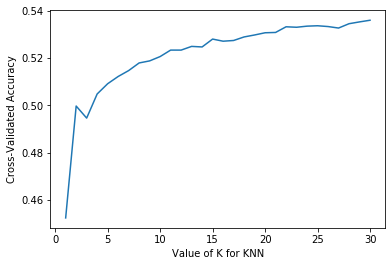

In [79]:
# plot the value of K for KNN (x-axis) versus the cross-validated accuracy (y-axis)
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')

accuracy increases as k gets larger, (except k =4) 

In [80]:
feature_col3 = ['AVE_PAY_AMT','AVE_BILL','PAY_STATUS','MARRIAGE','AGE','EDUCATION_graduate school','SEX_female','default payment next month_default']
X3 = credit[feature_col3]
X3_train, X3_test, y_train, y_test = train_test_split(X3, y, random_state=123)

In [81]:
# define the parameter values that should be searched
k_range = list(range(1, 25))
weight_options = ['uniform', 'distance']

In [82]:
from sklearn.model_selection import GridSearchCV
# create a parameter grid: map the parameter names to the values that should be searched
param_grid = dict(n_neighbors=k_range, weights=weight_options)
print(param_grid)

{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24], 'weights': ['uniform', 'distance']}


In [83]:
# instantiate and fit the grid
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy', return_train_score=False)
grid.fit(X3, y)

GridSearchCV(cv=10, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=30, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24],
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [84]:
# view the results as a pandas DataFrame
pd.DataFrame(grid.cv_results_)[['mean_test_score', 'std_test_score', 'params']]

,mean_test_score,std_test_score,params
0,0.452533,0.011319,"{'n_neighbors': 1, 'weights': 'uniform'}"
1,0.452533,0.011319,"{'n_neighbors': 1, 'weights': 'distance'}"
2,0.498967,0.009514,"{'n_neighbors': 2, 'weights': 'uniform'}"
3,0.452967,0.010852,"{'n_neighbors': 2, 'weights': 'distance'}"
4,0.493633,0.008993,"{'n_neighbors': 3, 'weights': 'uniform'}"
5,0.480467,0.010187,"{'n_neighbors': 3, 'weights': 'distance'}"
6,0.502100,0.009296,"{'n_neighbors': 4, 'weights': 'uniform'}"
7,0.490833,0.008988,"{'n_neighbors': 4, 'weights': 'distance'}"
8,0.508167,0.008344,"{'n_neighbors': 5, 'weights': 'uniform'}"
9,0.498433,0.008308,"{'n_neighbors': 5, 'weights': 'distance'}"


In [85]:
# create LIMI_BAL_GP
# Use floor_divide by 100000 to get the tens, then multiply by 100000. 
credit['LIMIT_BAL_GP'] = np.floor_divide(credit['LIMIT_BAL'],100000)
credit.loc[credit['LIMIT_BAL_GP'] == 0, 'LIMIT_BAL_GP'] = "<200000"
credit.loc[credit['LIMIT_BAL_GP'] == 1, 'LIMIT_BAL_GP'] = "<200000"
credit.loc[credit['LIMIT_BAL_GP'] == 2, 'LIMIT_BAL_GP'] = "<400000"
credit.loc[credit['LIMIT_BAL_GP'] == 3, 'LIMIT_BAL_GP'] = "<400000"
credit.loc[credit['LIMIT_BAL_GP'] == 4, 'LIMIT_BAL_GP'] = "<500000"
credit.loc[credit['LIMIT_BAL_GP'] == 5, 'LIMIT_BAL_GP'] = ">=500000"
credit.loc[credit['LIMIT_BAL_GP'] == 6, 'LIMIT_BAL_GP'] = ">=500000"
credit.loc[credit['LIMIT_BAL_GP'] == 7, 'LIMIT_BAL_GP'] = ">=500000"
credit.loc[credit['LIMIT_BAL_GP'] == 8, 'LIMIT_BAL_GP'] = ">=500000"
credit.loc[credit['LIMIT_BAL_GP'] == 9, 'LIMIT_BAL_GP'] = ">=500000"
credit.loc[credit['LIMIT_BAL_GP'] == 10, 'LIMIT_BAL_GP'] = ">=500000"

In [86]:
credit.tail(5)

,LIMIT_BAL,MARRIAGE,AGE,SEX_female,EDUCATION_graduate school,EDUCATION_high school,EDUCATION_university,default payment next month_default,AVE_BILL,AVE_PAY_AMT,PAY_STATUS,LIMIT_BAL_GP
29995,220000,1,39,0,0,1,0,0,120.891500,7.091667,12,<400000
29996,150000,2,43,0,0,1,0,0,3.530333,2.415000,8,<200000
29997,30000,2,37,0,0,0,1,1,11.749333,5.216667,20,<200000
29998,80000,1,41,0,0,1,0,1,44.435167,24.530167,11,<200000
29999,50000,1,46,0,0,0,1,1,38.479000,1.384667,12,<200000


In [87]:
y = credit.LIMIT_BAL_GP

In [88]:
# 10-fold cross-validation with K=5 for KNN (the n_neighbors parameter)
knn = KNeighborsClassifier(n_neighbors=5)
scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
print(scores)

[0.702      0.693      0.69166667 0.698      0.697      0.702
 0.692      0.677      0.683      0.69366667]


In [89]:
# use average accuracy as an estimate of out-of-sample accuracy
print(scores.mean())

0.6929333333333332


In [90]:
# search for an optimal value of K for KNN
k_range = list(range(5, 31))
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
    k_scores.append(scores.mean())
print(k_scores)

[0.6929333333333332, 0.6977, 0.6978, 0.7015666666666667, 0.7016333333333333, 0.7044333333333334, 0.7043333333333334, 0.7053999999999999, 0.7064, 0.7072, 0.7087666666666667, 0.7097, 0.7104333333333333, 0.7117333333333333, 0.7111999999999999, 0.7114666666666667, 0.7112333333333333, 0.7129333333333332, 0.7135999999999999, 0.7133, 0.7146333333333333, 0.7147333333333333, 0.7159333333333333, 0.7162666666666666, 0.7163, 0.7158333333333333]


Text(0, 0.5, 'Cross-Validated Accuracy')

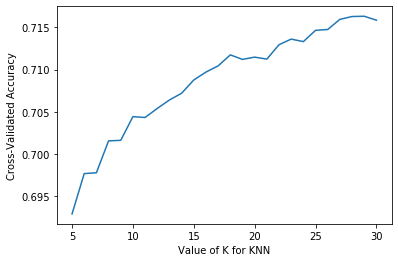

In [91]:
#plot the value of K for KNN (x-axis) versus the cross-validated accuracy (y-axis)
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')

In [93]:
# From the above, k=29 give us the highest accuracy
# 10-fold cross-validation with K=12 for KNN (the n_neighbors parameter)
knn = KNeighborsClassifier(n_neighbors=29)
scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
print(scores)

[0.721      0.71566667 0.718      0.717      0.71566667 0.723
 0.70766667 0.70633333 0.71433333 0.72433333]


In [94]:
# use average accuracy as an estimate of out-of-sample accuracy
print(scores.mean())

0.7163


accuracy is now 0.72. 

# Support Vector Machine (SVM)

A support-vector machine constructs a hyperplane or set of hyperplanes in a high- or infinite-dimensional space, which can be used for
classification, regression, or other tasks like outliers detection.Intuitively, a good separation is achieved by the hyperplane that has
the largest distance to the nearest training-data point of any class (so-called functional margin), since in general the larger the
margin, the lower the generalization error of the classifier

In [95]:
from sklearn.svm import SVC
# Start off with the default parameters, default is radial basis function kernel- can map to infinite dimensions
svc = SVC()

In [96]:
#train the model
svc.fit(X_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [97]:
#predfict
svc.score(X_test,y_test)

0.5504

In [98]:
#Change parameter C=10
svc = SVC(C=10)

In [99]:
svc.fit(X_train,y_train)

SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [100]:
svc.score(X_test,y_test)

0.5570666666666667

In [ ]:
#Change parameter gamma=1
# remember to use shift tab to see the parameters associate with SVC
# C :  Regularization parameter (>0, default=1.0), regularization strengthis inversely proportional to C
# kernel : 'linear', 'poly', 'rbf', 'sigmoid', 'precomputed' (default='rbf') 
svc = SVC(kernel ='poly')

In [ ]:
svc.fit(X_train,y_train)

In [ ]:
svc.score(X_test,y_test)

In [ ]:
svc = SVC(kernel ='linear')

In [ ]:
svc.fit(X_train,y_train)

In [ ]:
svc.score(X_test,y_test)

Note that it took too long to run SVC with kernel = 'linear'. SO task abort

# Recursive feature elimination with cross-validation

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV